## Long running normal operation with a telegraf overlay

In [1]:
import plot_utils
import rolling_funcs
from plot_utils import LogFile,LogFileType,Roller,Fig

WINDOW_SECS = 20.0

<a list of 2 Line2D objects>

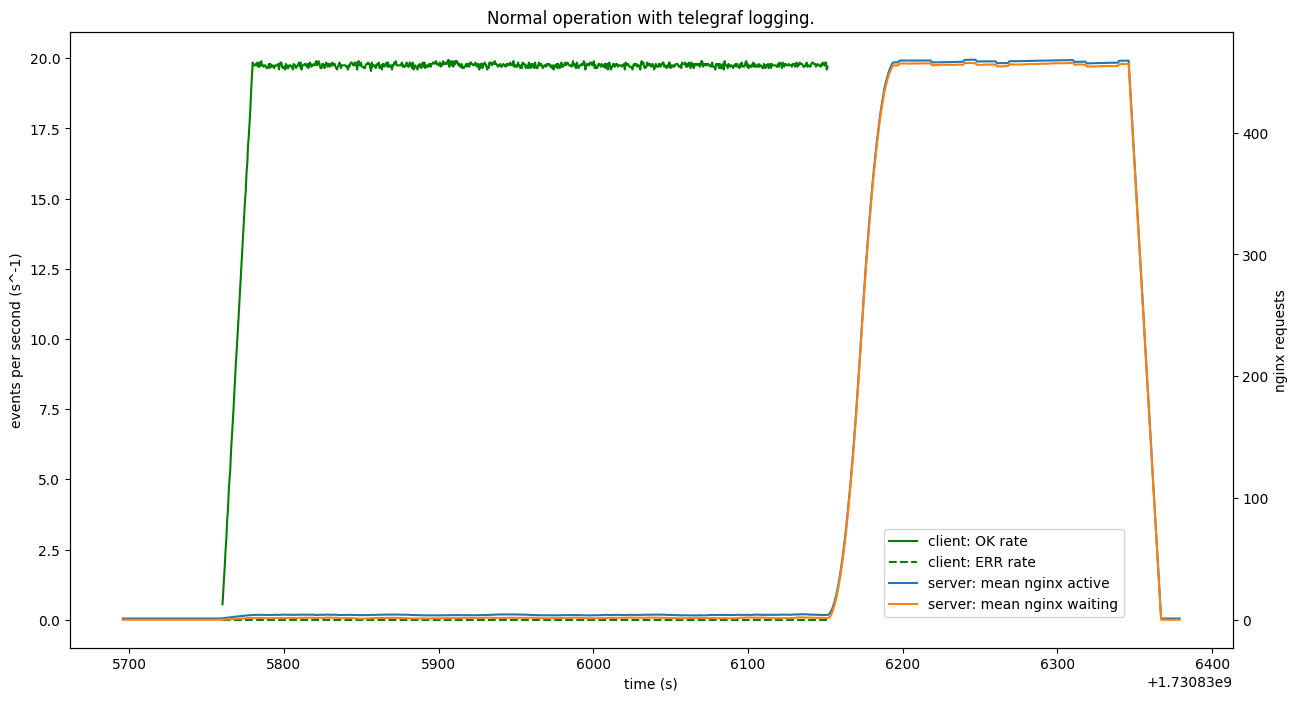

In [2]:
fig,ax = plot_utils.fig([
    Fig(title="Normal operation with telegraf logging.",x="time (s)",y="events per second (s^-1)")
])

telegraf_log = LogFile(log_type=LogFileType.TELEGRAF, path="./logs/hilbert/2024-11-05_19-42.json",
kwargs={'telegraf': {
    'nginx' : ['active', 'waiting']
}
})
client_log = LogFile(log_type=LogFileType.GOT, path="./logs/kleene/2024-11-05_19-42-39.899347.txt",kwargs={'color':'g'})

mean_roller = Roller('mean', rolling_funcs.mean)

response_rollers = [
    Roller("OK rate", rolling_funcs.count_ok, rate=True),
    Roller("ERR rate", rolling_funcs.count_err, rate=True, kwargs={'linestyle':'--'}),
]
# plot nginx on new scale
ax_zoom = ax.twinx()
ax_zoom.set_ylabel('nginx requests')

plot_utils.overlay_rolling(ax_zoom, {'server': telegraf_log}, [mean_roller],WINDOW_SECS,times_units='s')
plot_utils.overlay_rolling(ax, {'client': client_log}, response_rollers, WINDOW_SECS, const_stride_secs=0.5, times_units='s')

plot_utils.show_combined_legends([ax,ax_zoom], loc=[0.7,0.05])
ax_zoom.get_lines()